# Part 1

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

In [129]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [130]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


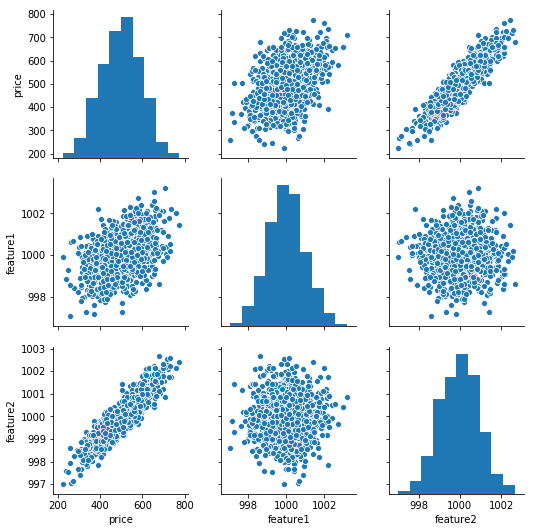

In [131]:
sns.pairplot(df)

In [132]:
from sklearn.model_selection import train_test_split
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [134]:
X_train.shape

(700, 2)

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [137]:
X_test = scaler.transform(X_test)

# Part 2

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [139]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse')

In [140]:
model.fit(X_train, y_train, epochs=300, verbose=1)

Epoch 1/300
700/700 [==============================] - 1s 2ms/sample - loss: 256680.7277
Epoch 2/300
700/700 [==============================] - 0s 96us/sample - loss: 256595.1354
Epoch 3/300
700/700 [==============================] - 0s 103us/sample - loss: 256499.9872
Epoch 4/300
700/700 [==============================] - 0s 94us/sample - loss: 256386.6607
Epoch 5/300
700/700 [==============================] - 0s 100us/sample - loss: 256252.4452
Epoch 6/300
700/700 [==============================] - 0s 100us/sample - loss: 256094.6386
Epoch 7/300
700/700 [==============================] - 0s 99us/sample - loss: 255909.0424
Epoch 8/300
700/700 [==============================] - 0s 94us/sample - loss: 255691.5686
Epoch 9/300
700/700 [==============================] - 0s 110us/sample - loss: 255441.0950
Epoch 10/300
700/700 [==============================] - 0s 110us/sample - loss: 255152.0088
Epoch 11/300
700/700 [==============================] - 0s 100us/sample - loss: 254821.8405
Epo

700/700 [==============================] - 0s 97us/sample - loss: 32.5389
Epoch 182/300
700/700 [==============================] - 0s 94us/sample - loss: 30.5940
Epoch 183/300
700/700 [==============================] - 0s 97us/sample - loss: 30.0481
Epoch 184/300
700/700 [==============================] - 0s 93us/sample - loss: 29.2884
Epoch 185/300
700/700 [==============================] - 0s 124us/sample - loss: 28.2014
Epoch 186/300
700/700 [==============================] - 0s 103us/sample - loss: 27.7275
Epoch 187/300
700/700 [==============================] - 0s 97us/sample - loss: 27.0757
Epoch 188/300
700/700 [==============================] - 0s 110us/sample - loss: 26.5412
Epoch 189/300
700/700 [==============================] - 0s 90us/sample - loss: 25.6703
Epoch 190/300
700/700 [==============================] - 0s 71us/sample - loss: 25.6942
Epoch 191/300
700/700 [==============================] - 0s 104us/sample - loss: 25.2038
Epoch 192/300
700/700 [===================

700/700 [==============================] - 0s 96us/sample - loss: 24.3821
Epoch 275/300
700/700 [==============================] - 0s 86us/sample - loss: 24.1389
Epoch 276/300
700/700 [==============================] - 0s 81us/sample - loss: 23.8320
Epoch 277/300
700/700 [==============================] - 0s 79us/sample - loss: 24.5710
Epoch 278/300
700/700 [==============================] - 0s 90us/sample - loss: 24.1717
Epoch 279/300
700/700 [==============================] - 0s 97us/sample - loss: 24.5557
Epoch 280/300
700/700 [==============================] - 0s 91us/sample - loss: 24.3825
Epoch 281/300
700/700 [==============================] - 0s 89us/sample - loss: 24.2393
Epoch 282/300
700/700 [==============================] - 0s 79us/sample - loss: 24.0412
Epoch 283/300
700/700 [==============================] - 0s 93us/sample - loss: 24.2697
Epoch 284/300
700/700 [==============================] - 0s 96us/sample - loss: 24.3111
Epoch 285/300
700/700 [=======================

In [141]:
loss_df = pd.DataFrame(model.history.history)

In [142]:
loss_df.head()

,loss
0,256680.727679
1,256595.135357
2,256499.987232
3,256386.660714
4,256252.445179


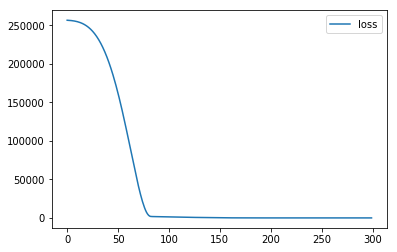

In [143]:
loss_df.plot()

# Part 3

In [144]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 1s 2ms/sample - loss: 25.0375


25.037464014689128

In [157]:
model.evaluate(X_train, y_train)

700/700 [==============================] - 0s 73us/sample - loss: 24.3416


24.34155240740095

In [158]:
y_pred = model.predict(X_test)

In [159]:
y_pred = pd.Series(y_pred.reshape(300,))
y_pred

0      404.866791
1      623.034851
2      591.646851
3      571.722107
4      366.172729
5      578.685852
6      514.554138
7      458.678528
8      548.750427
9      447.097900
10     611.286316
11     548.504150
12     418.669189
13     408.437317
14     650.763733
15     436.874451
16     508.020203
17     659.383057
18     662.051208
19     565.068787
20     333.813232
21     444.394043
22     382.098755
23     378.343719
24     566.109497
25     610.073914
26     531.915161
27     427.432434
28     654.906799
29     413.669373
          ...    
270    564.042542
271    447.583282
272    533.953796
273    381.386169
274    501.068237
275    636.591370
276    496.124908
277    567.903748
278    469.658386
279    272.971375
280    516.893372
281    620.899841
282    350.114197
283    449.988159
284    498.825989
285    542.505676
286    611.347778
287    387.739258
288    448.939850
289    481.975098
290    597.820435
291    498.906158
292    321.070007
293    554.672241
294    444

In [160]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [161]:
pred_df = pd.concat([pred_df, y_pred], axis=1)

In [163]:
pred_df.columns = ['Test True Y', 'Model Predictions']

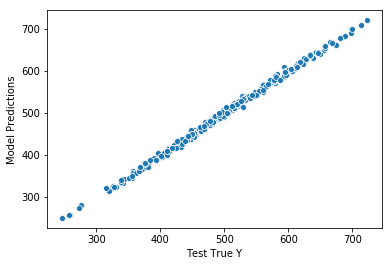

In [165]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [168]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.005483229333078

In [169]:
df.head(2)

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403


In [170]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [172]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.037467599084806

In [173]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

5.003745357138471

In [174]:
new_gem = [[998, 1000]]

In [176]:
new_gem = scaler.transform(new_gem)

In [177]:
model.predict(new_gem)

array([[419.22537]], dtype=float32)

In [179]:
from tensorflow.keras.models import load_model
model.save('my_MATHEUS_gem_model.h5')

In [180]:
later_model = load_model('my_MATHEUS_gem_model.h5')

In [181]:
later_model.predict(new_gem)

array([[419.22537]], dtype=float32)

# Part 3 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


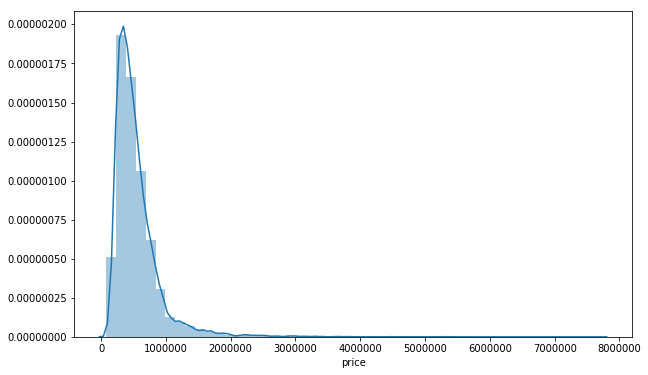

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

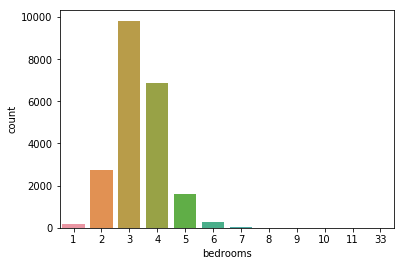

In [8]:
sns.countplot(df['bedrooms'])

In [12]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

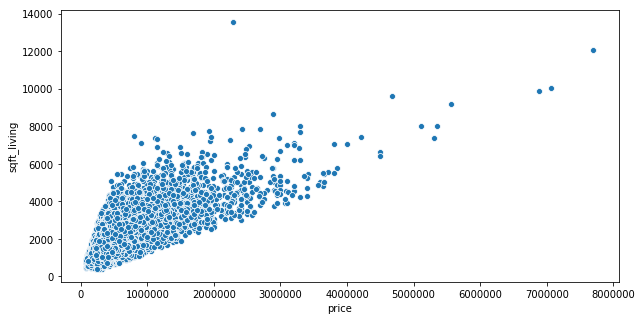

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

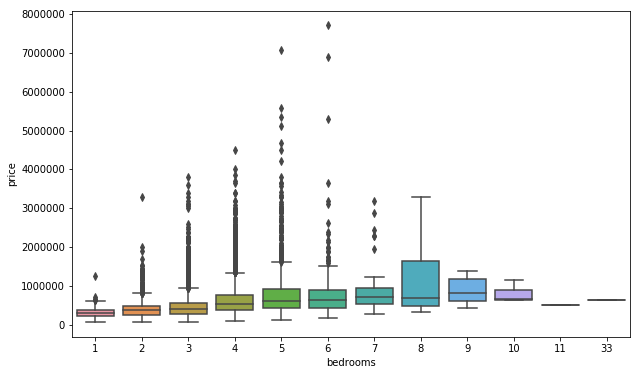

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

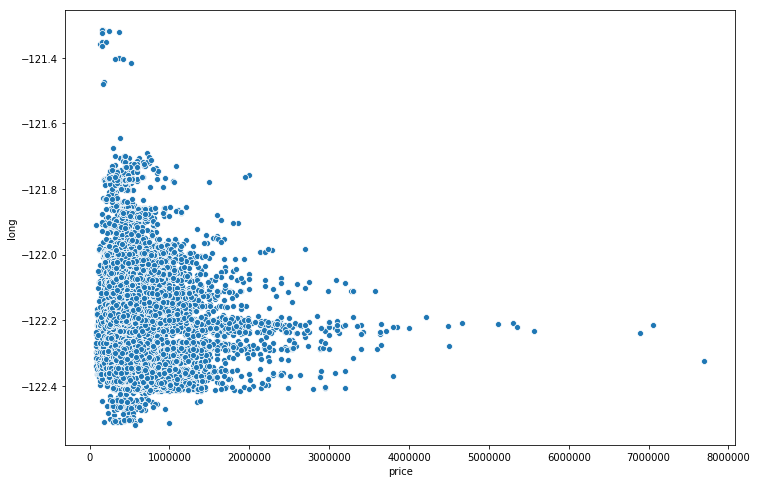

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='long', data=df)

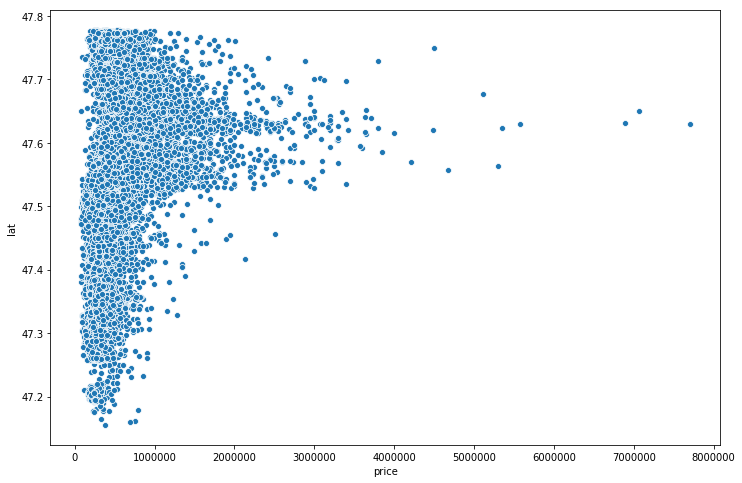

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='lat', data=df)

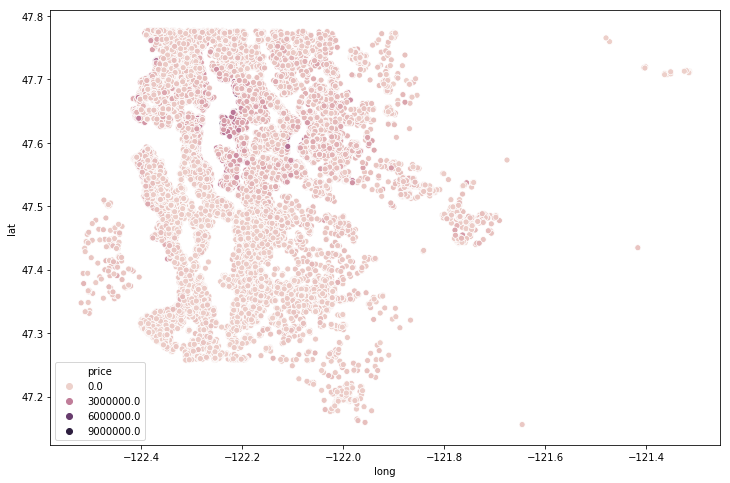

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [23]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [24]:
len(df)

21597

In [25]:
len(df)*0.01

215.97

In [26]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

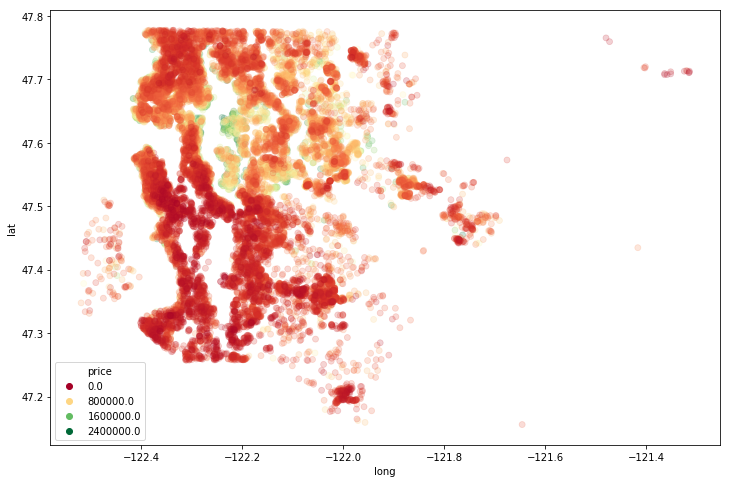

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price', 
                edgecolor=None, alpha=0.2, palette='RdYlGn')

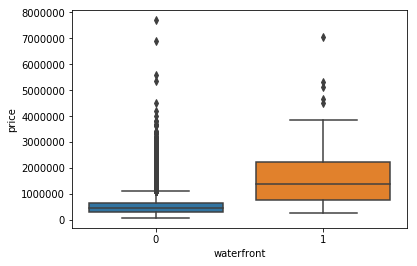

In [44]:
sns.boxplot(x='waterfront', y='price', data=df)

# Part 4 Feature Engineering

In [45]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
df = df.drop('id', axis=1)

In [48]:
df['date'] = pd.to_datetime(df['date'])

In [49]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21570   2014-10-15
21571   2015-03-05
21572   2014-11-13
21573   2014-09-10
21574   2014-05-14
21575   2014-10-02
21576   2015-04-16
21577   2015-03-17
21578   2014-10-17
21579   2014-10-31
21580   2014-08-13
21581   2015-04-21
21582   2014-10-13
21583   2014-09-15
21584   2014-10-15
21585   2015-04-07
21586   2014-06-26
21587   2014-08-25
21588   2015

In [57]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [58]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


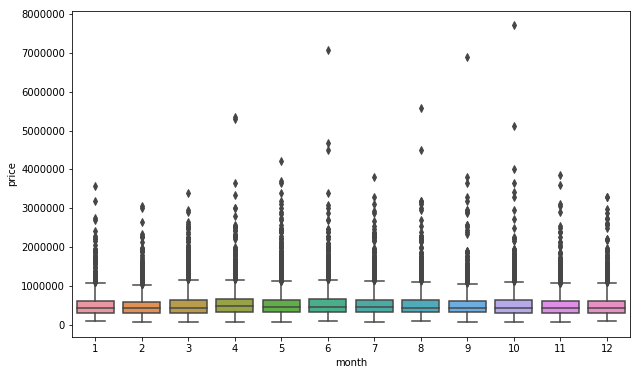

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

In [60]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

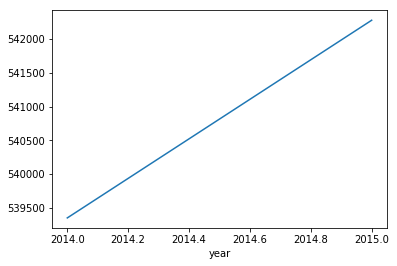

In [62]:
df.groupby('year').mean()['price'].plot()

In [63]:
df = df.drop('date', axis=1)

In [64]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [65]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [67]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [68]:
df = df.drop('zipcode', axis=1)

In [69]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [70]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

# Part 5 Model Creation

In [72]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)

In [79]:
X_test = scaler.transform(X_test)

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [83]:
X_train.shape

(15117, 19)

In [86]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [87]:
# the smaller the batch size, the longer its going to take. The smaller the batch size the less likely you will overfit
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Instructions for updating:
Use tf.cast instead.
Train on 15117 samples, validate on 6480 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
15117/15117 [==============================] - 4s 281us/sample - loss: 430237508346.4624 - val_loss: 418899780494.2222
Epoch 2/400
15117/15117 [==============================] - 0s 32us/sample - loss: 428963188950.3240 - val_loss: 414525183802.7852
Epoch 3/400
15117/15117 [==============================] - 0s 33us/sample - loss: 412189123468.7772 - val_loss: 376667527132.6025
Epoch 4/400
15117/15117 [==============================] - 1s 34us/sample - loss: 333013434427.6097 - val_loss: 251022941823.6840
Epoch 5/400
15117/15117 [==============================] - 1s 43us/sample - loss: 181829904211.2673 - val_loss: 114307086320.8296
Epoch 6/400
15117/15117 [==============================] - 1s 41us/sample - loss: 104105453346.7667 - val_loss: 95193002024.4543
Epoch 7/400
15117/15117 [==============================] - 1s 45us/sample -

Epoch 60/400
15117/15117 [==============================] - 0s 27us/sample - loss: 40297399959.4967 - val_loss: 39086407336.1383
Epoch 61/400
15117/15117 [==============================] - 0s 31us/sample - loss: 40162474922.7175 - val_loss: 38893114598.0840
Epoch 62/400
15117/15117 [==============================] - 0s 26us/sample - loss: 39900598751.8582 - val_loss: 38683164955.1802
Epoch 63/400
15117/15117 [==============================] - 0s 25us/sample - loss: 39683829443.2557 - val_loss: 38465633960.1383
Epoch 64/400
15117/15117 [==============================] - 0s 25us/sample - loss: 39508675643.1355 - val_loss: 38281959595.9309
Epoch 65/400
15117/15117 [==============================] - 0s 24us/sample - loss: 39320847417.2389 - val_loss: 38102095442.1728
Epoch 66/400
15117/15117 [==============================] - 0s 26us/sample - loss: 39156382981.8086 - val_loss: 38085146998.2025
Epoch 67/400
15117/15117 [==============================] - 0s 27us/sample - loss: 39004174568.61

Epoch 123/400
15117/15117 [==============================] - 1s 35us/sample - loss: 33694227518.0483 - val_loss: 32404398752.5531
Epoch 124/400
15117/15117 [==============================] - 1s 38us/sample - loss: 33669361736.6155 - val_loss: 32333433443.8716
Epoch 125/400
15117/15117 [==============================] - 0s 32us/sample - loss: 33602856659.1403 - val_loss: 32290506114.8444
Epoch 126/400
15117/15117 [==============================] - 0s 29us/sample - loss: 33573928934.1240 - val_loss: 32244645711.0123
Epoch 127/400
15117/15117 [==============================] - 0s 26us/sample - loss: 33628657109.5620 - val_loss: 32197568006.3210
Epoch 128/400
15117/15117 [==============================] - 0s 27us/sample - loss: 33503676817.1463 - val_loss: 32175701545.7185
Epoch 129/400
15117/15117 [==============================] - 0s 26us/sample - loss: 33500489721.2262 - val_loss: 32118931071.6840
Epoch 130/400
15117/15117 [==============================] - 0s 25us/sample - loss: 334008

Epoch 248/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30986580606.4674 - val_loss: 29166840642.3704
Epoch 249/400
15117/15117 [==============================] - ETA: 0s - loss: 31113316739.459 - 0s 26us/sample - loss: 31004312828.7994 - val_loss: 29142877110.6765
Epoch 250/400
15117/15117 [==============================] - 0s 29us/sample - loss: 30969213111.0289 - val_loss: 29072450163.0420
Epoch 251/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30933944978.8228 - val_loss: 29071750849.4222
Epoch 252/400
15117/15117 [==============================] - 0s 30us/sample - loss: 30895803353.8633 - val_loss: 29133711071.7630
Epoch 253/400
15117/15117 [==============================] - 0s 28us/sample - loss: 30920770181.5461 - val_loss: 29059121743.6444
Epoch 254/400
15117/15117 [==============================] - 0s 26us/sample - loss: 30905586050.6503 - val_loss: 29138817077.0963
Epoch 255/400
15117/15117 [=============================

Epoch 311/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30344657827.0292 - val_loss: 28287515721.3235
Epoch 312/400
15117/15117 [==============================] - 1s 55us/sample - loss: 30349239965.1190 - val_loss: 28271928752.3556
Epoch 313/400
15117/15117 [==============================] - 1s 53us/sample - loss: 30354965870.7860 - val_loss: 28262681875.5951
Epoch 314/400
15117/15117 [==============================] - 1s 48us/sample - loss: 30383961151.8772 - val_loss: 28242048250.3111
Epoch 315/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30335433997.8017 - val_loss: 28254691135.8420
Epoch 316/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30296997991.2332 - val_loss: 28240380389.4519
Epoch 317/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30343609174.1801 - val_loss: 28210868527.4074
Epoch 318/400
15117/15117 [==============================] - 1s 51us/sample - loss: 303300

Epoch 374/400
15117/15117 [==============================] - 1s 68us/sample - loss: 29758281387.2086 - val_loss: 27594671071.1309
Epoch 375/400
15117/15117 [==============================] - 1s 66us/sample - loss: 29794471188.7110 - val_loss: 27581446907.5753
Epoch 376/400
15117/15117 [==============================] - 1s 50us/sample - loss: 29745658745.8104 - val_loss: 27586110340.1086
Epoch 377/400
15117/15117 [==============================] - 1s 57us/sample - loss: 29755427952.7843 - val_loss: 27557127537.1457
Epoch 378/400
15117/15117 [==============================] - 1s 48us/sample - loss: 29726668212.7089 - val_loss: 27591504585.0074
Epoch 379/400
15117/15117 [==============================] - 1s 52us/sample - loss: 29704748923.0974 - val_loss: 27567925809.3037
Epoch 380/400
15117/15117 [==============================] - 1s 54us/sample - loss: 29688454441.8453 - val_loss: 27588708453.1358
Epoch 381/400
15117/15117 [==============================] - 1s 58us/sample - loss: 297032

# Part 6 Model Evaluation

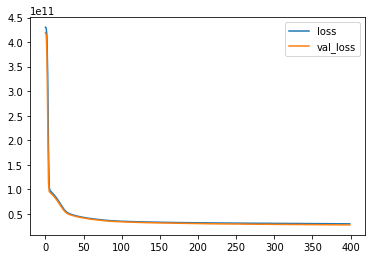

In [90]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [92]:
y_pred = model.predict(X_test)

In [95]:
np.sqrt(mean_squared_error(y_test, y_pred))

165270.05691269273

In [96]:
mean_absolute_error(y_test, y_pred)

102660.75358796296

In [97]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [98]:
5.402966e+05

540296.6

In [100]:
mean_absolute_error(y_test, y_pred) / 5.402966e+05

0.19000814291254647

In [101]:
explained_variance_score(y_test, y_pred)

0.7942482484186224

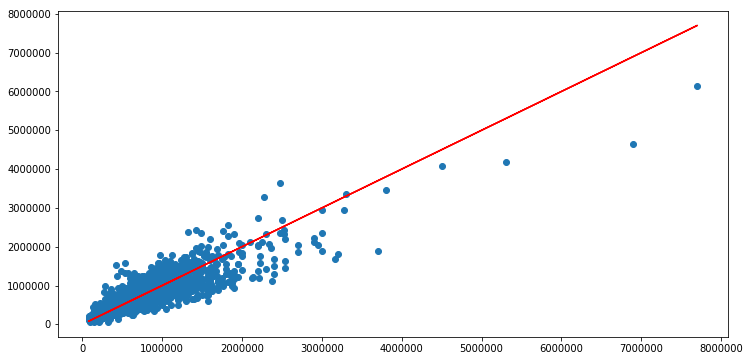

In [104]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')

In [107]:
single_house = df.drop('price', axis=1).iloc[0]

In [110]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [111]:
model.predict(single_house)

array([[291440.3]], dtype=float32)

In [112]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


# Part 7 EDA and Preprocessing

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


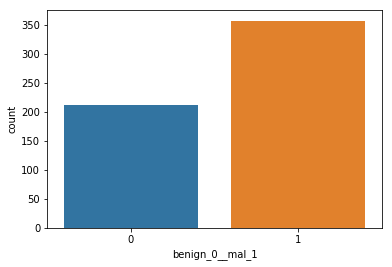

In [119]:
sns.countplot(x='benign_0__mal_1', data=df)

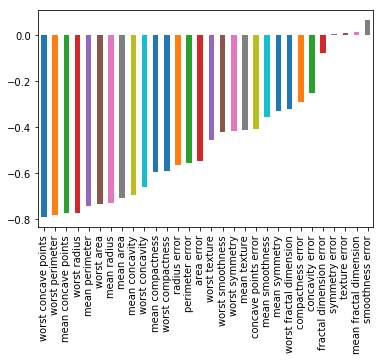

In [123]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

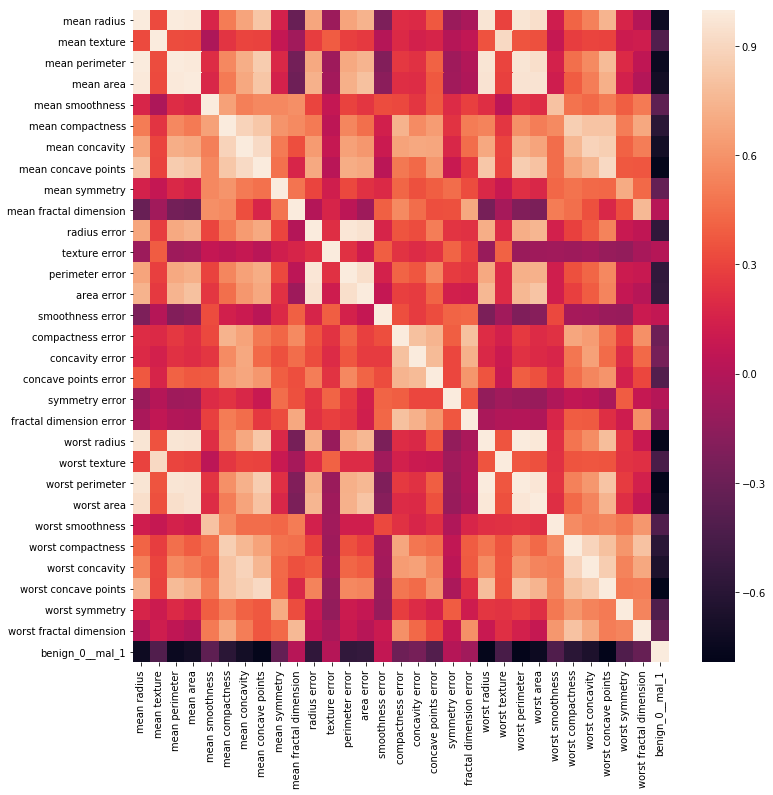

In [125]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr())

In [127]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [128]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()

In [133]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part 8 Model Creation

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [135]:
X_train.shape

(426, 30)

In [188]:
(X_train.shape[1] - 1)//2

14

In [138]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [139]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.6267 - val_loss: 0.5993
Epoch 2/600
426/426 [==============================] - 0s 113us/sample - loss: 0.5818 - val_loss: 0.5514
Epoch 3/600
426/426 [==============================] - 0s 141us/sample - loss: 0.5342 - val_loss: 0.5068
Epoch 4/600
426/426 [==============================] - 0s 134us/sample - loss: 0.4904 - val_loss: 0.4612
Epoch 5/600
426/426 [==============================] - 0s 143us/sample - loss: 0.4466 - val_loss: 0.4167
Epoch 6/600
426/426 [==============================] - 0s 139us/sample - loss: 0.4113 - val_loss: 0.3759
Epoch 7/600
426/426 [==============================] - 0s 129us/sample - loss: 0.3717 - val_loss: 0.3423
Epoch 8/600
426/426 [==============================] - 0s 150us/sample - loss: 0.3392 - val_loss: 0.3094
Epoch 9/600
426/426 [==============================] - 0s 136us/sample - loss: 0.3131 - val_loss: 0.2841
Epoch 10/60

426/426 [==============================] - 0s 124us/sample - loss: 0.0402 - val_loss: 0.1139
Epoch 154/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0397 - val_loss: 0.1199
Epoch 155/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0388 - val_loss: 0.1178
Epoch 156/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0391 - val_loss: 0.1223
Epoch 157/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0379 - val_loss: 0.1169
Epoch 158/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0385 - val_loss: 0.1181
Epoch 159/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0385 - val_loss: 0.1177
Epoch 160/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0375 - val_loss: 0.1226
Epoch 161/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0398 - val_loss: 0.1179
Epoch 162/600
426/426 [============================

426/426 [==============================] - 0s 127us/sample - loss: 0.0213 - val_loss: 0.1437
Epoch 306/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0215 - val_loss: 0.1514
Epoch 307/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0223 - val_loss: 0.1520
Epoch 308/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0242 - val_loss: 0.1396
Epoch 309/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0244 - val_loss: 0.1445
Epoch 310/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0248 - val_loss: 0.1519
Epoch 311/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0195 - val_loss: 0.1381
Epoch 312/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0236 - val_loss: 0.1660
Epoch 313/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0240 - val_loss: 0.1433
Epoch 314/600
426/426 [============================

426/426 [==============================] - 0s 195us/sample - loss: 0.0105 - val_loss: 0.1906
Epoch 458/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0102 - val_loss: 0.1632
Epoch 459/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0099 - val_loss: 0.1870
Epoch 460/600
426/426 [==============================] - 0s 190us/sample - loss: 0.0108 - val_loss: 0.17679   
Epoch 461/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0102 - val_loss: 0.1829
Epoch 462/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0108 - val_loss: 0.1672
Epoch 463/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0106 - val_loss: 0.1823
Epoch 464/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0110 - val_loss: 0.1736
Epoch 465/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0101 - val_loss: 0.1777
Epoch 466/600
426/426 [========================

In [140]:
losses = pd.DataFrame(model.history.history)

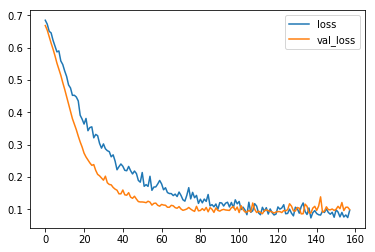

In [166]:
losses.plot()

In [167]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [168]:
from tensorflow.keras.callbacks import EarlyStopping

In [169]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [170]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.7442 - val_loss: 0.7200
Epoch 2/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6980 - val_loss: 0.6879
Epoch 3/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6711 - val_loss: 0.6634
Epoch 4/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6475 - val_loss: 0.6394
Epoch 5/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6217 - val_loss: 0.6135
Epoch 6/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5949 - val_loss: 0.5846
Epoch 7/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5628 - val_loss: 0.5470
Epoch 8/600
426/426 [==============================] - 0s 101us/sample - loss: 0.5241 - val_loss: 0.5072
Epoch 9/600
426/426 [==============================] - 0s 108us/sample - loss: 0.4861 - val_loss: 0.4702
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0556 - val_loss: 0.1101
Epoch 79/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0549 - val_loss: 0.1067
Epoch 80/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0550 - val_loss: 0.1089
Epoch 81/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0548 - val_loss: 0.1094
Epoch 82/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0575 - val_loss: 0.1083
Epoch 83/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0590 - val_loss: 0.1132
Epoch 84/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0536 - val_loss: 0.1055
Epoch 00084: early stopping


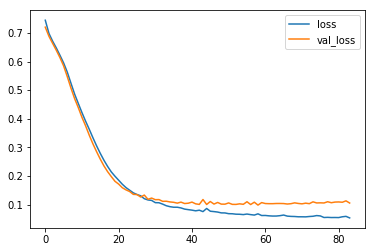

In [171]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [172]:
losses[-10:]

,loss,val_loss
74,0.061758,0.105893
75,0.060576,0.106295
76,0.055038,0.105797
77,0.055579,0.110114
78,0.054915,0.106702
79,0.055050,0.108917
80,0.054799,0.109370
81,0.057547,0.108343
82,0.059032,0.113230
83,0.053591,0.105544


In [173]:
from tensorflow.keras.layers import Dropout

In [174]:
 model = Sequential()

model.add(Dense(30, activation='relu'))
# Half of these 30 neurons will be turned
# off randomly at each batch of training
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [175]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6734 - val_loss: 0.6284
Epoch 2/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6291 - val_loss: 0.6049
Epoch 3/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6261 - val_loss: 0.5789
Epoch 4/600
426/426 [==============================] - 0s 138us/sample - loss: 0.5945 - val_loss: 0.5538
Epoch 5/600
426/426 [==============================] - 0s 131us/sample - loss: 0.5835 - val_loss: 0.5302
Epoch 6/600
426/426 [==============================] - 0s 134us/sample - loss: 0.5605 - val_loss: 0.5045
Epoch 7/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5488 - val_loss: 0.4854
Epoch 8/600
426/426 [==============================] - 0s 134us/sample - loss: 0.5361 - val_loss: 0.4634
Epoch 9/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5176 - val_loss: 0.4461
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 139us/sample - loss: 0.1186 - val_loss: 0.0998
Epoch 79/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1482 - val_loss: 0.1054
Epoch 80/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1347 - val_loss: 0.0996
Epoch 81/600
426/426 [==============================] - 0s 113us/sample - loss: 0.1380 - val_loss: 0.1018
Epoch 82/600
426/426 [==============================] - 0s 117us/sample - loss: 0.1486 - val_loss: 0.1139
Epoch 83/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1686 - val_loss: 0.1018
Epoch 84/600
426/426 [==============================] - 0s 124us/sample - loss: 0.1197 - val_loss: 0.1004
Epoch 85/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1280 - val_loss: 0.1004
Epoch 86/600
426/426 [==============================] - 0s 124us/sample - loss: 0.1045 - val_loss: 0.0979
Epoch 87/600
426/426 [========================

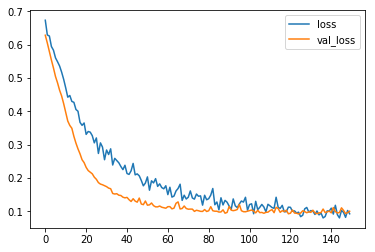

In [176]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [177]:
losses[-10:]

,loss,val_loss
140,0.109528,0.095456
141,0.091790,0.111308
142,0.118188,0.099168
143,0.089830,0.095259
144,0.080311,0.096394
145,0.102574,0.110527
146,0.096966,0.102849
147,0.081966,0.093317
148,0.102537,0.096432
149,0.092588,0.100381


In [182]:
y_pred = model.predict_classes(X_test)

In [183]:
from sklearn.metrics import classification_report, confusion_matrix

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [185]:
print(confusion_matrix(y_test, y_pred))

[[54  1]
 [ 3 85]]
